In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
#################################################
# 0) FUNCTIONS                                  #
#################################################

In [3]:
import sys
sys.path.append('../')
from func import *

#DEFINED FUNCTIONS :
    
#unique_clean(data,col,pr=0)

#df_with_text(data,col,text)
#text_in_df(data,col,text)
#two_text_in_df(data,col,text1,text2)
#two_text_in_df(data,col,text1,text2='')

#values_U_not_nan(data,col_name)
#not_nan_get_values(data,col_name,pr=0)
#not_nan_get_index(data, col_name, pr=0)
#nan_get_index(data, col_name, pr=0)

#is_not_decimal(a)
#is_not_13(a)
#split_text_left(text_to_split,text)
#split_item_left(st)
#split_item_right(st)

#find_weight(text):     #s = re.compile('\d+G') extracts '210G'

In [ ]:
#################################################
# 1) IMPORT M_PROD (FRANCE + SALES)                                  #
#################################################

In [ ]:
#################################################
# 5) df_M_PROD EXPLORATION  
#################################################

In [5]:
#list of all the brands
BRANDS_U = pd.DataFrame(sorted(unique_clean(df_N_PROD,'N_MARQUE',pr=0)), columns =['BRANDS'])
BRANDS_U

NameError: name 'df_N_PROD' is not defined

In [ ]:
#AUT MQ = other brands (cf. OpenFF) / with EAN13 
#MDD = retailer brands (generally similar products to top sales in category) / no EAN13 detail
#MDD 1 PRX = retailer brands (lowest price in category, generally lower quality products) / no EAN13 detail
#MQ FAB 1 PRX = independant brands (lowest price in category) / with EAN13 details

In [26]:
temp = df_N_PROD[[ 'N_MARQUE', 'N_EAN13', 'N_EMBALLAGE', 'N_SAME_PRODUCT', 'N_DERNIER CAM', 'N_CATEGORY']]
temp[temp['N_MARQUE'] == 'MDD']

,N_MARQUE,N_EAN13,N_EMBALLAGE,N_SAME_PRODUCT,N_DERNIER CAM,N_CATEGORY
10,MDD,0,BRIC,NaN,30922.6,AUT SCE
40,MDD,0,DOY PAC,NaN,10404.9,AUT SCE
160,MDD,0,POT,NaN,223671.1,AUT SCE
194,MDD,0,BRIC,NaN,172796.2,SAUCES POUR FECULENTS
231,MDD,0,BTE FER,NaN,1716115.1,SAUCES POUR FECULENTS
298,MDD,0,DOY PAC,NaN,68275.0,SAUCES POUR FECULENTS
314,MDD,0,FLA PLAS,NaN,50949.1,SAUCES POUR FECULENTS
1142,MDD,0,POT,NaN,30787099.7,SAUCES POUR FECULENTS
1516,MDD,0,TUB,NaN,858828.7,SAUCES POUR FECULENTS


In [28]:
temp_by_brand = temp.groupby(by='N_MARQUE').sum().sort_values(by='N_DERNIER CAM', ascending=False)
temp_by_brand

,N_DERNIER CAM
N_MARQUE,
MDD,33919062.4
PANZANI,28699809.7
BARILLA,9563414.9
ZAPETTI BUITONI,3751200.1
HEINZ,3039459.2
SACLA,1585406.4
AUT MQ,960493.9
JARDIN BIO,903909.8
MQ FAB 1 PRX,547005.1


In [29]:
round(temp_by_brand['N_DERNIER CAM'].sum(), 0)

83943112.0

In [ ]:
#analysing product

In [108]:
len(df_N_PROD['N_SAME_PRODUCT'].unique())

771

In [109]:
df_prod_summary = df_N_PROD[['N_SAME_PRODUCT', 'N_COUNT', 'N_DERNIER CAM', 'N_CAM AN-1']].groupby(['N_SAME_PRODUCT']).sum()

In [110]:
df_prod_summary.shape

(770, 3)

In [111]:
df_prod_summary.describe()

,N_COUNT,N_DERNIER CAM,N_CAM AN-1
count,770.000000,7.700000e+02,7.700000e+02
mean,1.859740,6.496630e+04,6.617940e+04
std,3.400614,3.534545e+05,4.281951e+05
min,1.000000,0.000000e+00,0.000000e+00
25%,1.000000,2.187500e+01,1.850000e+01
50%,1.000000,7.729500e+02,7.727500e+02
75%,1.000000,7.762175e+03,7.033825e+03
max,47.000000,4.905420e+06,8.800759e+06


In [112]:
df_prod_summary.tail(20)

,N_COUNT,N_DERNIER CAM,N_CAM AN-1
N_SAME_PRODUCT,,,
"ZAPETTI BUITONI, LEGUMES, CURRY A LA CORIANDRE, POT,",1,0.0,3.1
"ZAPETTI BUITONI, LEGUMES, FROMAGE, POT,",2,6.7,522.8
"ZAPETTI BUITONI, LEGUMES, GRECQUE COMPOTEE D'AUBERGINES, POT,",1,1.2,181.2
"ZAPETTI BUITONI, LEGUMES, H OLIVE, BTE FER,",3,803789.5,795268.4
"ZAPETTI BUITONI, LEGUMES, HERB PROV, POT,",1,0.0,0.0
"ZAPETTI BUITONI, LEGUMES, NAPOLITAIN, POT,",7,3868.1,29428.5
"ZAPETTI BUITONI, LEGUMES, NATURE, POT,",2,0.0,0.0
"ZAPETTI BUITONI, LEGUMES, NATURE, TUB,",1,0.0,0.2
"ZAPETTI BUITONI, LEGUMES, OLIVES CHAMPIGNONS A L'ORIGAN, POT,",1,0.8,2.6


[Text(0, 0.5, 'number of unit products'), Text(0.5, 0, 'number of formats')]

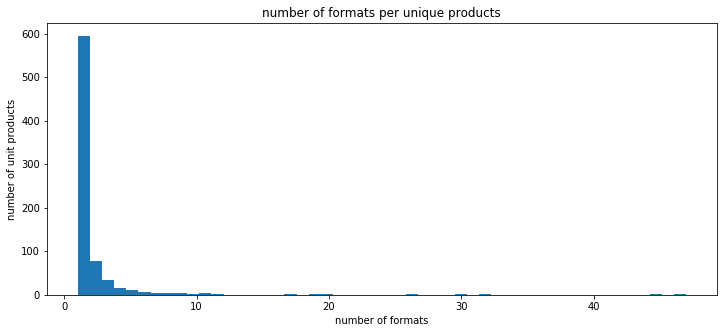

In [113]:
df_prod_summary['N_COUNT'].plot.hist(bins=50, title='number of formats per unique products', figsize=(12,5)).set(xlabel='number of formats', ylabel='number of unit products')

[Text(0, 0.5, 'number of unit products'), Text(0.5, 0, 'number of formats')]

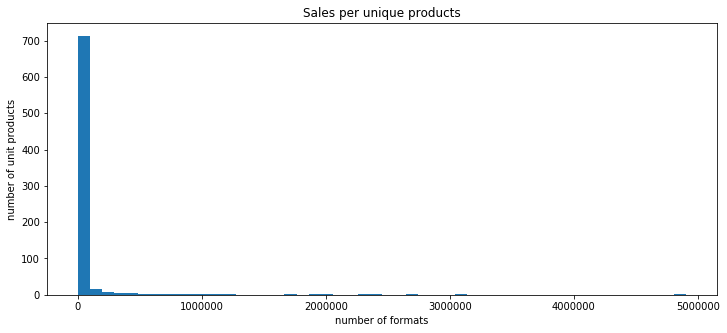

In [114]:
df_prod_summary['N_DERNIER CAM'].plot.hist(bins=50, title='Sales per unique products', figsize=(12,5)).set(xlabel='number of formats', ylabel='number of unit products')

[Text(0, 0.5, 'number of unit products'),
 Text(0.5, 0, 'number of formats (EAN13)')]

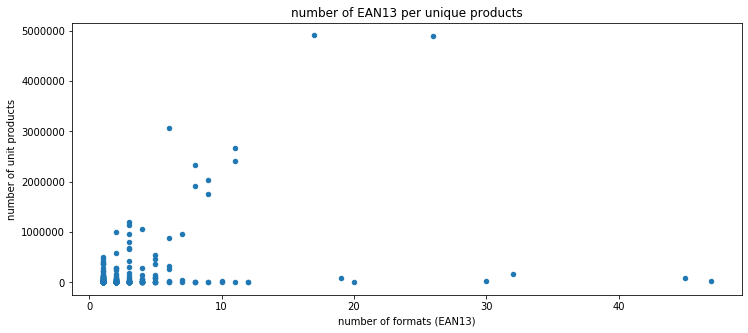

In [115]:
df_prod_summary.plot.scatter(x='N_COUNT', y='N_DERNIER CAM', title='number of EAN13 per unique products', figsize=(12,5)).set(xlabel='number of formats (EAN13)', ylabel='number of unit products')

In [116]:
df_prod_summary[df_prod_summary['N_COUNT'] > 10]

,N_COUNT,N_DERNIER CAM,N_CAM AN-1
N_SAME_PRODUCT,,,
"AUT MQ, BIO, BASILIC, POT,",12,10217.7,3288.5
"AUT MQ, BOLO CLASSIQUE, BOLOGNAISE, POT,",32,168415.0,99866.9
"AUT MQ, LEGUMES, ARRABIATA, POT,",30,31511.6,30837.3
"AUT MQ, LEGUMES, BASILIC, POT,",45,87811.2,84480.8
"AUT MQ, LEGUMES, NAPOLITAIN, POT,",12,6762.0,6920.5
"AUT MQ, LEGUMES, NATURE, POT,",19,95229.0,95189.4
"AUT MQ, LEGUMES, OLIVE, POT,",11,14668.4,13612.7
"AUT MQ, PESTO, PESTO RGE, POT,",20,10183.1,13165.5
"AUT MQ, PESTO, PESTO VERD, POT,",47,21023.8,24861.9


**Estimation des EAN Manquants**